# Lab work №4

Let's create methods that determine functions and divide the data into training and test datasets in an optimal ratio of 3:1

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

def y_func(x):
    return np.sin((x-2)/2)*x+np.sin(x-3)

def z_func(x, y):
    return np.cos(y+x/2)

x_train, x_test = np.linspace(0, 12, 150), np.linspace(12, 16, 50)
x_combined = np.concatenate((x_train, x_test))
y_train, y_test = y_func(x_train), y_func(x_test)
z_train, z_test = z_func(x_train, y_train), z_func(x_test, y_test)


Let's model the function:

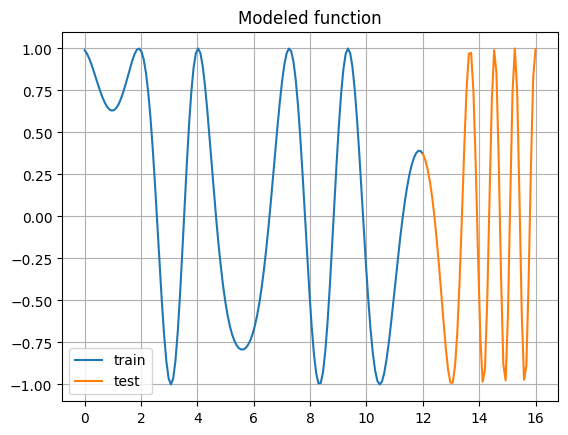

In [2]:
def model_func_graph(title, z_predicted=None):
    plt.plot(x_train, z_train, label="train")
    plt.plot(x_test, z_test, label="test")
    if z_predicted is not None:
        plt.plot(x_test, z_predicted, label="predicted")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

model_func_graph("Modeled function")

Now let's create model functions for different types of networks: feed forward backprop, cascade - forward backprop and elman backprop

In [3]:
def feed_forward_backprop(neurons_per_layer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons_per_layer, activation='relu', input_shape=(2,)))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

def cascade_forward_backprop(neurons_per_layer, hidden_layers=1):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons_per_layer, activation='relu'))
    for i in range(hidden_layers):
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

def elman_backprop(neurons_per_layer, hidden_layers=1):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense (neurons_per_layer, activation='relu', input_shape=(1, 2)))
    for _ in range(hidden_layers):
        model.add(tf.keras.layers.SimpleRNN(neurons_per_layer, activation='relu', return_sequences=True))
    model.add(tf.keras.layers.SimpleRNN(neurons_per_layer, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model


Now, using all three models with different parameters, let's plot the graphs and calculate the root mean square errors for each case:

2/2 [==============================] - 0s 1ms/step


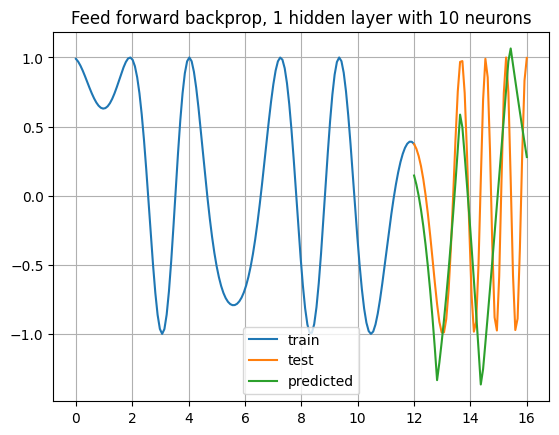


MSE: 0.6036689274321997
2/2 [==============================] - 0s 1ms/step


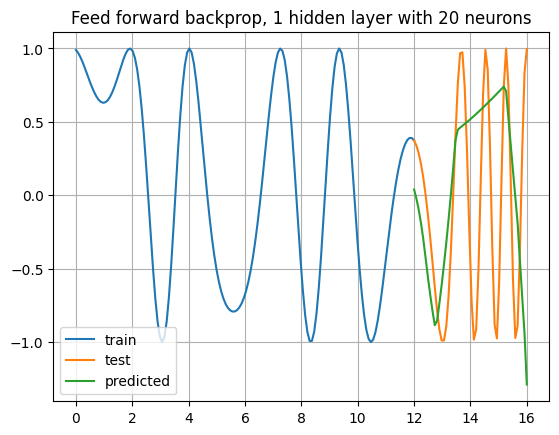


MSE: 0.6277082758605862
2/2 [==============================] - 0s 913us/step


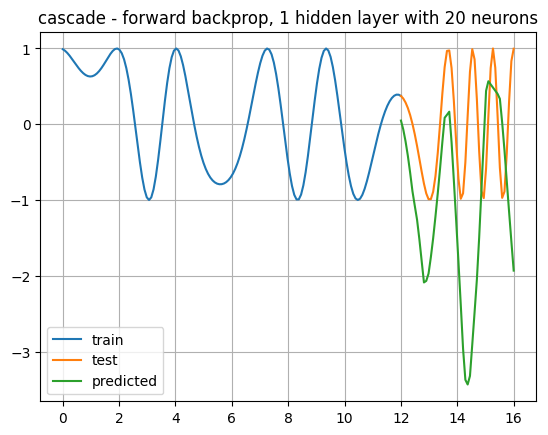


MSE: 2.3290619134718207
2/2 [==============================] - 0s 1ms/step


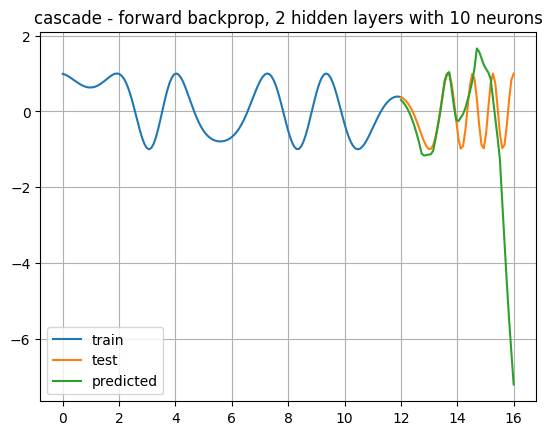


MSE: 4.0527864036102095
2/2 [==============================] - 0s 1ms/step


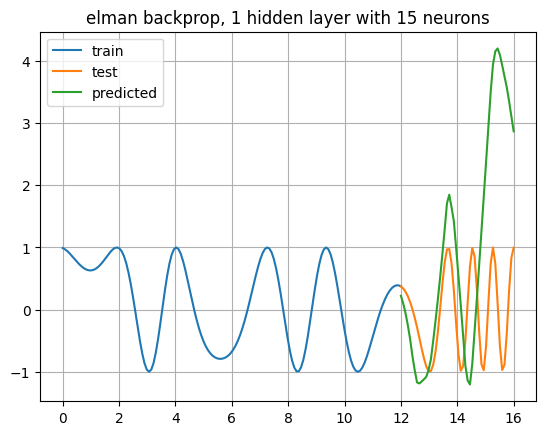


MSE: 3.9890708281248743
2/2 [==============================] - 0s 2ms/step


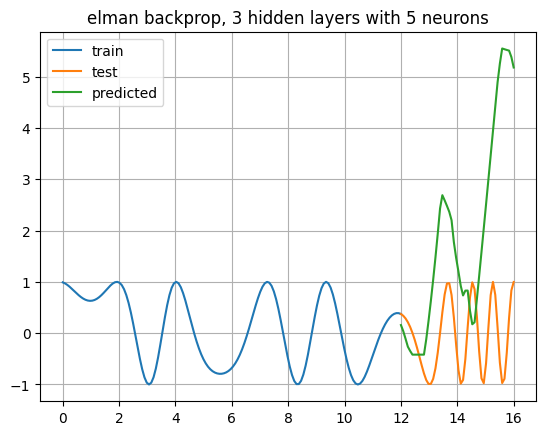


MSE: 7.291438816567512


In [4]:
def plot_models(model, neurons_per_layer, title, hidden_layers=None):
    if(hidden_layers):
        obj = model(neurons_per_layer, hidden_layers)
    else:
        obj = model(neurons_per_layer)

    train_values = np.vstack((x_train, y_train)).T
    test_values = np.vstack((x_test, y_test)).T
    if model == elman_backprop:
        train_values = np.expand_dims(train_values, axis=1)
        test_values = np.expand_dims(test_values, axis=1)
    obj.fit(train_values, z_train, epochs=1000, verbose=0)
    predicted_data = obj.predict(test_values)
    model_func_graph(title=title, z_predicted=predicted_data)
    print("\nMSE: "  + str(mean_squared_error(z_test, predicted_data)))

plot_models(feed_forward_backprop, 10, "Feed forward backprop, 1 hidden layer with 10 neurons")
plot_models(feed_forward_backprop, 20, "Feed forward backprop, 1 hidden layer with 20 neurons")
plot_models(cascade_forward_backprop, 20, "cascade - forward backprop, 1 hidden layer with 20 neurons")
plot_models(cascade_forward_backprop, 10, "cascade - forward backprop, 2 hidden layers with 10 neurons", 2)
plot_models(elman_backprop, 15, "elman backprop, 1 hidden layer with 15 neurons")
plot_models(elman_backprop, 5, "elman backprop, 3 hidden layers with 5 neurons", 3)